<a href="https://colab.research.google.com/github/tusharbargal81/LGM-VIP-DATA-SCUENCE/blob/main/Data%20Science/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LETS GROW MORE
Task Completed By : Tushar Subhash Bargal

Task 02 :Stock Price Pridiction

Deep Learning - Stock Market Prediction And Forecasting Using Stacked LSTM
Dataset Used- https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [ ]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Importing the dataset
url= 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [ ]:
#printing head values
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [ ]:
#printing tail values
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
#shaping
data.shape

(2035, 8)

In [ ]:
#Getting columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
#info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
#checking null values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
#discribing
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
#Picking Up Close Column
data1 = data.reset_index()['Close']

In [ ]:
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
#shaping data 1
data1.shape

(2035,)

Text(0, 0.5, 'Y-axis')

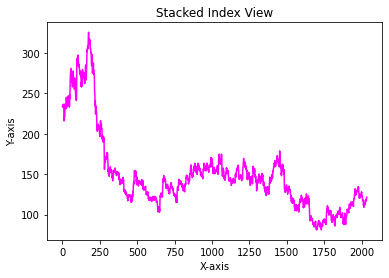

In [ ]:
#visualisation of data
plt.plot(data1, color = 'magenta')
plt.title("Stacked Index View")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

Min-Max Scaler
LSTM are sensitive to the scale of the data, so using Min-Max scaler to transform the values from 0 to 1.So in order to that we need to reshape so that we can fit transform

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
#Now the data1 is transformed into an array and it now having the values between zero to one
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
data.shape

(2035, 8)

In [ ]:
#Splitting Train Test
train_size = int(len(data)*0.65)
test_size = len(data1) - train_size
train_data, test_data = data1[0:train_size,:],data1[train_size:len(data1),:1]
train_size,test_size

(1322, 713)

In [ ]:
train_data,test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.25347222],
        [0.26041667],
        [0.2563317 ]]), array([[0.24652778],
        [0.23611111],
        [0.25204248],
        [0.25919118],
        [0.25776144],
        [0.2681781 ],
        [0.25449346],
        [0.27103758],
        [0.24530229],
        [0.26756536],
        [0.27267157],
        [0.26633987],
        [0.27410131],
        [0.28615196],
        [0.27818627],
        [0.27205882],
        [0.27124183],
        [0.27798203],
        [0.27083333],
        [0.25857843],
        [0.24285131],
        [0.2250817 ],
        [0.23447712],
        [0.24346405],
        [0.23611111],
        [0.22937092],
        [0.21527778],
        [0.20976307],
        [0.20751634],
        [0.2060866 ],
        [0.20445261],
        [0.20098039],
        [0.21180556],
        [0.19301471],
        [0.18974673],
        [0.20302288],
        [0.21752451],
        [0.20629085],
        [0.1915849

Data Preprocessing
Now, Splitting the data into x and y, the timestep value will be 100. In the 0th iteration the first 100 records will goes as first record and the 101 elements will be in the x. The 100 elements will be in the y

converting an array of values into a dataset matrix

In [ ]:
def create_data(dataset,time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_data(train_data,time_step)
x_test,y_test = create_data(test_data,time_step)
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [ ]:
x_train.shape,y_train.shape

((1221, 100), (1221,))

In [ ]:
x_test.shape,y_test.shape

((612, 100), (612,))

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#stalked LTSM

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.0 MB/s 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 11s 261ms/step - loss: 0.0300 - val_loss: 0.0067
Epoch 2/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 3/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0015 - val_loss: 9.1556e-04
Epoch 6/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0014 - val_loss: 9.1906e-04
Epoch 7/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0013 - val_loss: 8.2420e-04
Epoch 9/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0013 - val_loss: 8.5334e-04
Epoch 10/100
20/20 [==============================] - 4s 194ms/step - loss

Predicteding The Values

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.50010407850914

Plotting The Final Graph

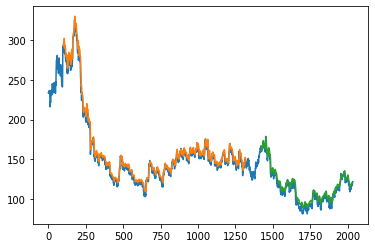

In [ ]:
look_back = 100

# shift train prediction
trainPredict = np.empty_like(data1)
trainPredict[:,:] = np.nan
trainPredict[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction
testPredict = np.empty_like(data1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (look_back * 2)+1:len(data1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()